In [4]:
# Dependencies and setup

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

In [5]:
# Preview city data

city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [6]:
# Preview ride data

ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [7]:
# Merge ride data with city data

pyber_data = pd.merge(ride_data_df, city_data_df, how='left', on='city')
pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


# Bubble Plot of Ride Sharing Data

In [8]:
# Calculate average fare, total rides, total drivers, and city type

average_fare = pyber_data.groupby('city')['fare'].mean()
total_rides = pyber_data.groupby('city')['ride_id'].count()
total_drivers = pyber_data.groupby('city')['driver_count'].mean()
city_type = city_data_df.set_index('city')['type']

In [9]:
# Create dataframe with above calculations

pyber_bubble = pd.DataFrame({"Average Fare Per City":average_fare, "Total Rides":total_rides, "Total Drivers":total_drivers,"City Type":city_type})
pyber_bubble.head()


,Average Fare Per City,Total Rides,Total Drivers,City Type
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


In [10]:
# Filter each city type for bubble plots

urban_bubble = pyber_bubble.loc[pyber_bubble["City Type"]=="Urban"]

suburban_bubble = pyber_bubble.loc[pyber_bubble["City Type"]=="Suburban"]

rural_bubble = pyber_bubble.loc[pyber_bubble["City Type"]=="Rural"]

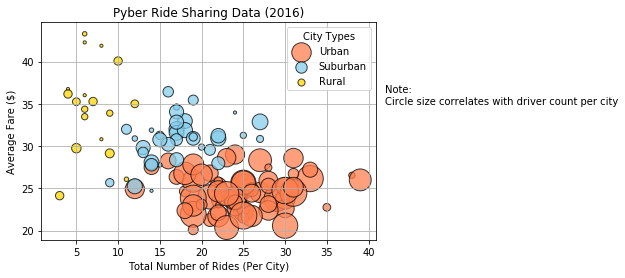

In [11]:
# Create and format bubble plots

plt.scatter(urban_bubble["Total Rides"], urban_bubble["Average Fare Per City"], color="coral", edgecolors="black", s=urban_bubble["Total Drivers"]*10, alpha=0.75, label="Urban")

plt.scatter(suburban_bubble["Total Rides"], suburban_bubble["Average Fare Per City"], color="skyblue", edgecolors="black", s=suburban_bubble["Total Drivers"]*10, alpha=0.75, label="Suburban")

plt.scatter(rural_bubble["Total Rides"], rural_bubble["Average Fare Per City"], color="gold", edgecolors="black", s=rural_bubble["Total Drivers"]*10, alpha=0.75, label="Rural")

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend(loc="upper right", title="City Types")
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city")
plt.grid(True)
plt.savefig("figures/pyber_bubble_nb.png")
plt.show()

# make legend bubbles the same size

# Total Fares by City Type

In [12]:
# Calculate total fares by city type

total_fares_pie = pyber_data.groupby('type')['fare'].sum()

total_fares_pie

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

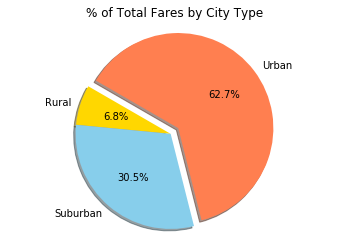

In [13]:
# Create and format pie chart for percentage of total fares by city type

total_fares_pie.index

colors = ["gold", "skyblue", "coral"]
explode = (0, 0, 0.1)
plt.pie(total_fares_pie, labels=total_fares_pie.index, colors=colors, explode=explode, startangle=150 ,shadow=True, autopct="%1.1f%%")
plt.title("% of Total Fares by City Type")
plt.axis("equal")
plt.savefig("figures/total_fares_pie_nb.png")
plt.show()



# Total Rides by City Type

In [14]:
# Calculate total rides by city type

total_rides_pie = pyber_data.groupby('type')['ride_id'].count()

total_rides_pie

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

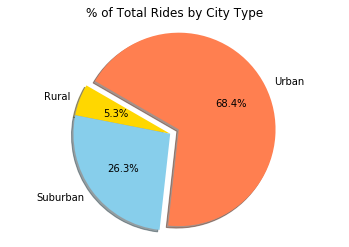

In [15]:
# Create and format pie chart for percentage of total rides by city type

total_rides_pie.index

colors = ["gold", "skyblue", "coral"]
explode = (0, 0, 0.1)
plt.pie(total_rides_pie, labels=total_rides_pie.index, colors=colors, explode=explode, startangle=150 ,shadow=True, autopct="%1.1f%%")
plt.title("% of Total Rides by City Type")
plt.axis("equal")
plt.savefig("figures/total_rides_pie_nb.png")
plt.show()



# Total Drivers by City Type

In [16]:
# Calculate total drivers by city type

total_drivers_pie = city_data_df.groupby('type')['driver_count'].sum()

total_drivers_pie

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

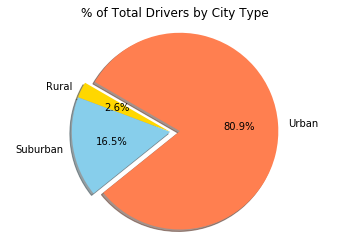

In [17]:
# Create and format pie chart for percentage of total drivers by city type

total_drivers_pie.index

colors = ["gold", "skyblue", "coral"]
explode = (0, 0, 0.1)
plt.pie(total_drivers_pie, labels=total_drivers_pie.index, colors=colors, explode=explode, startangle=150 ,shadow=True, autopct="%1.1f%%")
plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.savefig("figures/total_drivers_pie_nb.png")
plt.show()



# Three Observable Trends

1. On average, there are more rides & drivers and lower fares in urban cities.

2. Although Pyber rates for rural and suburban areas tend to be higher, they account for less than half of total fares.

3. More than four out of five drivers work in urban cities.